In [1]:
import os

In [2]:
import sklearn.cluster

In [3]:
import gdal

In [4]:
import numpy as np

In [5]:
import cv2

In [6]:
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.pyplot as plt
import rasterio

In [7]:
from glob import glob

In [8]:
ndvi_path = os.getcwd() + "\\ndvi_images"

In [9]:
print(os.path.exists(ndvi_path))

True


In [10]:
ndvi_images = glob(ndvi_path + "\\*.tif")

In [11]:
for scene in ndvi_images:
    print(scene)

C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Godavari20180225.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Godavari20190215.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Krishna20170210.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Krishna20180302.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Krishna20190210.tif
C:\Users\Hello\Documents\remote-sensing\APIs\SentinelSat\ndvi_images\Krishna20200215.tif


In [12]:
def saveImage(src, savePath, arr):
    with rasterio.Env():
        profile = src.profile
        profile.update(
            dtype=rasterio.float64,
            count=1)
        with rasterio.open(savePath, 'w', **profile) as dst:
            dst.write(arr.astype(rasterio.float64), 1)

In [13]:
def imMap(date, img):
    ep.plot_bands(img, 
        cmap='Spectral',
        scale=False,
        title=date)
    plt.show()

In [14]:
def hist(date, img):
    ep.hist(img,
            figsize=(12, 6),
            title=[date])
    plt.show()

In [15]:
def filterImage(ndvi_image, ndvi, lower, upper):
    condition = (ndvi > lower)
    ndvi_cond = np.where(condition == 0, np.nan, ndvi)
    condition = (ndvi <= upper)
    ndvi_cond = np.where(condition == 0, np.nan, ndvi_cond)
    area = np.count_nonzero(ndvi_cond != np.nan)
    print("Pixels with NDVI > ", lower, " and <= ", upper, " = ", area)
    print("Land area with NDVI > ", lower, " and <= ", upper, " = ", area / 100, " hectares")
    #saveImage(ndvi_image, savePath, ndvi_cond)
    imMap(str(lower)+"-"+str(upper), ndvi_cond)
    return ndvi_cond

In [17]:
scene = ndvi_images[-1]
image = gdal.Open(scene)

In [19]:
ndvi = image.GetRasterBand(1).ReadAsArray()

In [20]:
ndvi_ = ndvi.reshape((-1, 1))

In [22]:
k_means = sklearn.cluster.KMeans(n_clusters=4)

In [29]:
type(k_means)

sklearn.cluster._kmeans.KMeans

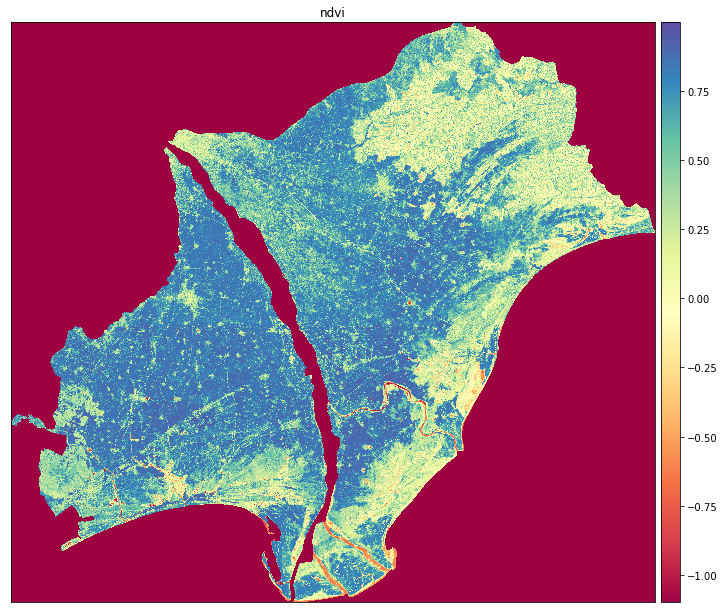

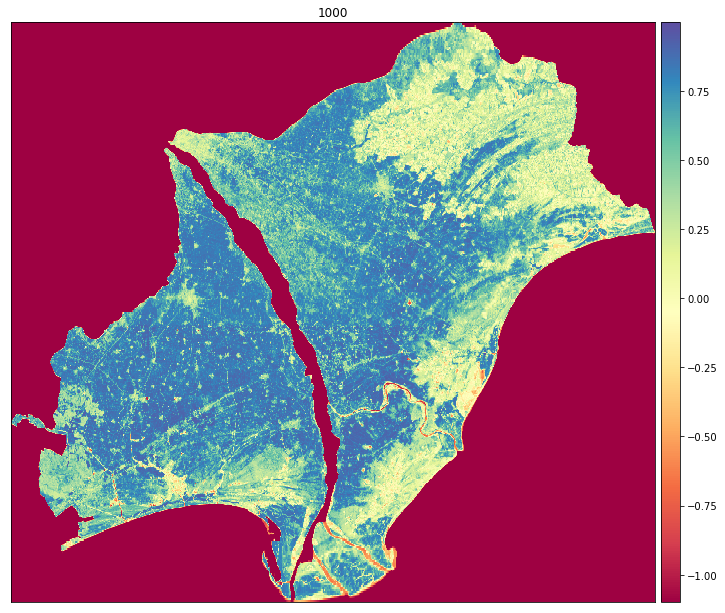

In [22]:
imMap("ndvi", ndvi)
imMap("1000", scene_cluster_1500)

In [23]:
type(scene_cluster_1500)

numpy.ndarray

In [24]:
scene = ndvi_images[-1]
with rasterio.open(scene) as src:
    ndvi = src.read()
print(type(ndvi))

<class 'numpy.ndarray'>


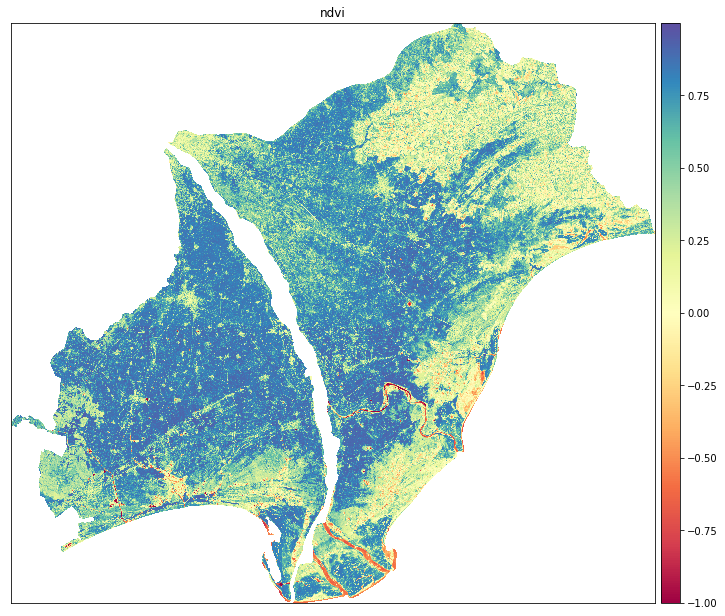

In [25]:
imMap("ndvi", ndvi)

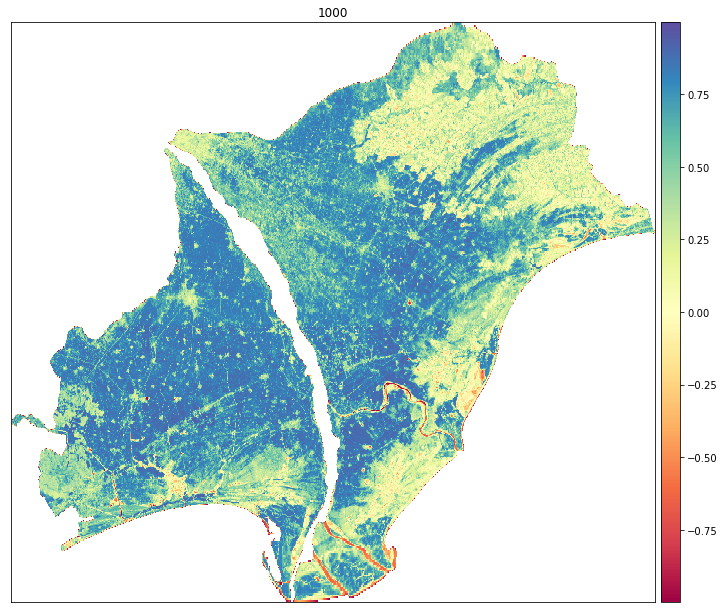

In [26]:
scene_cluster = np.where(scene_cluster_1500 < -1, np.nan, scene_cluster_1500)
imMap("1000", scene_cluster)

In [27]:
toPath = os.getcwd() + "\\ndvi_clusters\\_600\\" 
if not os.path.exists(toPath):
    os.makedirs(toPath)

In [28]:
ndvi_images[-1].split('\\')[-1]

'Krishna20200215.tif'

In [29]:
saveImage(rasterio.open(ndvi_images[-1]), toPath + ndvi_images[-1].split('\\')[-1], scene_cluster)

In [30]:
def filterImage(ndvi_image, ndvi, lower, upper):
    condition = (ndvi > lower)
    ndvi_cond = np.where(condition == 0, np.nan, ndvi)
    condition = (ndvi <= upper)
    ndvi_cond = np.where(condition == 0, np.nan, ndvi_cond)
    area = np.count_nonzero(ndvi_cond != np.nan)
    print("Pixels with NDVI > ", lower, " and <= ", upper, " = ", area)
    print("Land area with NDVI > ", lower, " and <= ", upper, " = ", area / 100, " hectares")
    #saveImage(ndvi_image, savePath, ndvi_cond)
    imMap(str(lower)+"-"+str(upper), ndvi_cond)
    return ndvi_cond

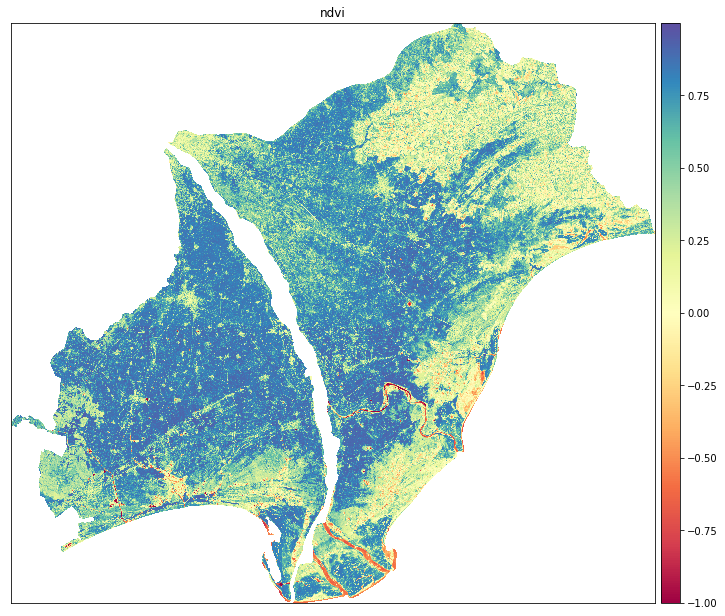

C:\Users\Hello\.conda\envs\pro\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Hello\.conda\envs\pro\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


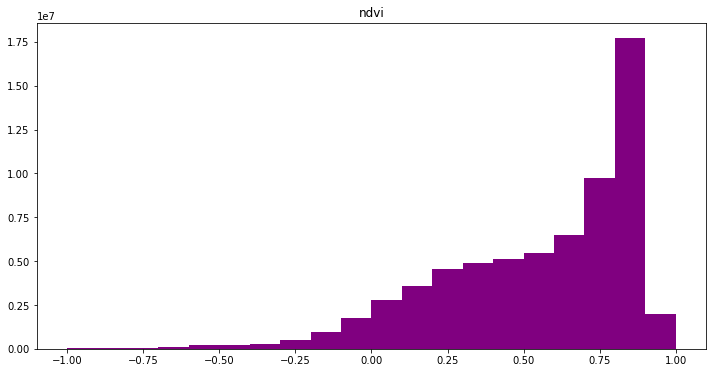

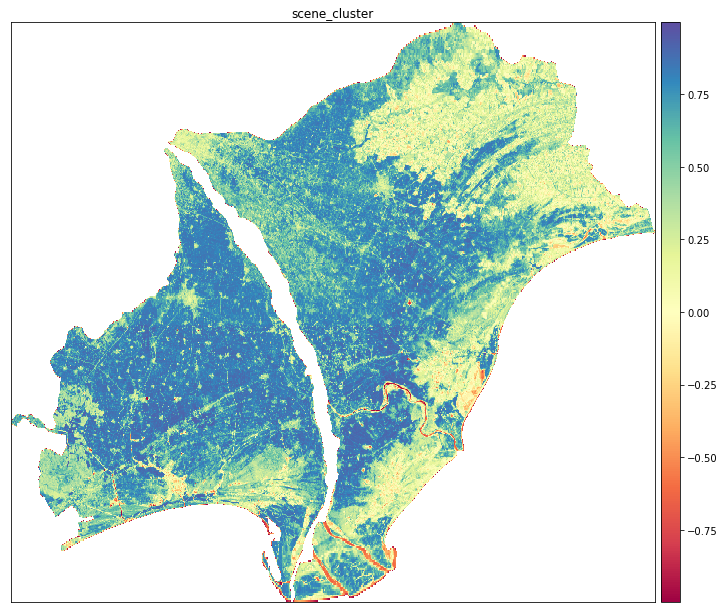

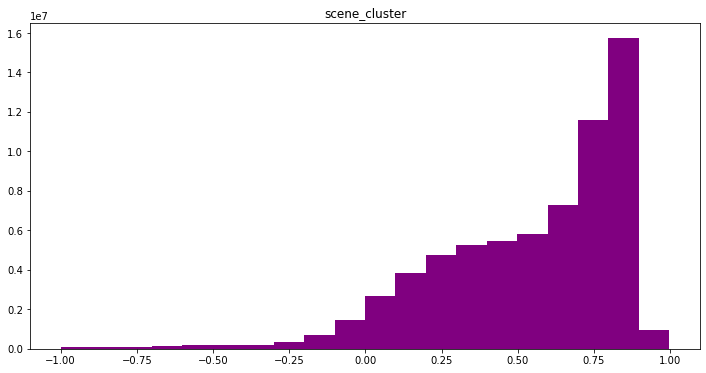

TypeError: invalid path or file: array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [31]:
scene = scene_cluster
imMap("ndvi", ndvi)
hist("ndvi", ndvi)
imMap("scene_cluster", scene_cluster)
hist("scene_cluster", scene_cluster)
ranges = [-1.01, -0.4, -0.2, -0.1, 0.3, 0.6, 1.01]
for i in range(1, len(ranges)):
    filterImage(rasterio.open(scene), scene_cluster, ranges[i-1], ranges[i])